<a href="https://colab.research.google.com/github/caiodavic/Processamento-de-Linguagem-Natural-2022.1/blob/main/Classifica%C3%A7%C3%A3o_de_Texto_com_Word_Embedding_Pr%C3%A9_Treinado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Sátiras com Word Embedding Pré Treinado
- Vamos classificar um dataset que contém notícias reais e sátiras utilizando Word Embeddings. Vamos utilizar um Vetor de Palavras disponibilizado [no repósitorio de Word Embeddings do NILC](http://www.nilc.icmc.usp.br/embeddings). 

### Importando as Bibliotecas necessárias

In [ ]:
!pip install gensim==4.2.0
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Leitura de Dados e Divisão dos Dados

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/2022.1/PLN/csv_satiras_reais.csv')
data.head()

,title,text,label
0,crise e tao grande que nem tiozao do pave fez...,a familia guimaraes passou a noite de natal pe...,satire
1,nao me representam diz jesus sobre intolerant...,uma menina de 11 anos apedrejada ao sair de um...,satire
2,marina silva e heloisa helena montam novo par...,insatisfeitas com seus partidos com as siglas ...,satire
3,dez propostas que podem realmente mudar o brasil,o instituto nupal nucleo de pesquisas da ameri...,satire
4,apresentadora do cidade alerta bahia dara cur...,assassinatos sequestros mortes violentas. nen...,satire


In [ ]:
x = data['text']
y = [1 if i == 'satire' else 0 for i in data['label']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

### Preparação dos dados

#### Tokenização, criação do vocabulário e "padded"
- A fim de transformar nossos dados  para que a primeira camada possa receber, precisamos tokenizar, e fazer com que todos os vetores de sentenças tenham a mesma dimensão.


In [ ]:
from keras.preprocessing.text import Tokenizer
vocab_size = 10000
oov_token = "<OOV>"
max_length = 100
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)

- Vamos criar nosso tokenizador com os dados da coluna de texto do treinamento 

In [ ]:
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [ ]:
word_index

In [ ]:
len(word_index)

62191

- Agora precisamos mapear nossas palavras para o índice que o tokenizador criou.

In [ ]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

- Com as palavras mapeadas para valores, precisamos agora tornar todas as sequências do mesmo tamanho. Temos um tamanho máximo de 100. Vamos utilizar `padding`e `truncating`com o valor 'post', isso significa que tanto para truncar a sentença ou aumentar o seu vetor será feito no final do vetor.

In [ ]:
x_train_padded = pad_sequences(x_train_sequences,maxlen=100,padding = 'post',truncating='post')
x_test_padded = pad_sequences(x_test_sequences,maxlen=100,padding = 'post',truncating='post')

### Gerando a Matrix de Embeddings para o nosso vocabulário
- Primeiro vamos importar um Word Embedding pré-treinado utilizando a biblioteca gensim
- Depois vamos mapear cada palavra do nosso vocabulário para o Vetor correspondete no Word Embedding. 

In [ ]:
from gensim.models import KeyedVectors
model_embedding = KeyedVectors.load_word2vec_format('/content/gdrive/MyDrive/2022.1/PLN/skip_s100.txt')

In [ ]:
model_embedding.most_similar(positive=['amor'])

[('desamor', 0.8173337578773499),
 ('afeto', 0.7566705942153931),
 ('encanto', 0.75653475522995),
 ('sublime', 0.7454006671905518),
 ('encantamento', 0.7423512935638428),
 ('ciúme', 0.7335120439529419),
 ('arrebatamento', 0.7330907583236694),
 ('sortilégio', 0.7301666140556335),
 ('fingimento', 0.7118589878082275),
 ('ódio', 0.7108227014541626)]

In [ ]:
model_embedding.get_vector('amor')

array([ 0.094688,  0.020484, -0.049591, -0.154428, -0.194843,  0.178407,
        0.216229,  0.08028 , -0.13208 , -0.069052,  0.182697, -0.050938,
        0.122551,  0.011508,  0.021781,  0.152326,  0.052517,  0.285276,
        0.475469, -0.123257,  0.031875,  0.411406,  0.203213,  0.224658,
       -0.130703, -0.200906,  0.086363, -0.145371, -0.252867, -0.145347,
       -0.047758, -0.071754,  0.101082, -0.196188, -0.02103 ,  0.224569,
        0.138657, -0.004517, -0.158483,  0.050521,  0.089682,  0.051699,
        0.194155, -0.221766,  0.622454, -0.125129,  0.255115, -0.035937,
        0.2972  ,  0.095792, -0.15754 , -0.103723,  0.703258,  0.430454,
        0.249805,  0.005314,  0.173957,  0.069553,  0.00305 ,  0.368506,
        0.174279,  0.09282 ,  0.021418, -0.041932,  0.039243, -0.16786 ,
        0.062402,  0.110994,  0.20235 ,  0.168782,  0.052548,  0.392852,
        0.040046,  0.007114,  0.285834,  0.075967,  0.0569  ,  0.146031,
        0.092562, -0.595235,  0.313186, -0.019095, 

In [ ]:
def get_embedding_matrix(word_index,embeddings_index):
    embedding_matrix = np.zeros((len(word_index)+1,100))
    for word,i in word_index.items():
        if embeddings_index.has_index_for(word):
            embedding_vector = embeddings_index.get_vector(word)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
embedding_matrix = get_embedding_matrix(tokenizer.word_index, model_embedding)

### Construindo a Rede Neural

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=100,weights=[embedding_matrix],input_length=100,trainable=False))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64,activation='relu')))
model.add(tf.keras.layers.Dense(6,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          6220900   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              21120     
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 6,242,801
Trainable params: 21,901
Non-trainable params: 6,220,900
_________________________________________________________________


In [ ]:
history = model.fit(x_train_padded,np.array(y_train),epochs=10,validation_data=(x_test_padded,np.array(y_test)))

Epoch 1/10
250/250 [==============================] - 26s 90ms/step - loss: 0.4279 - accuracy: 0.8019 - val_loss: 0.2865 - val_accuracy: 0.8840
Epoch 2/10
250/250 [==============================] - 22s 89ms/step - loss: 0.2799 - accuracy: 0.8936 - val_loss: 0.3370 - val_accuracy: 0.8690
Epoch 3/10
250/250 [==============================] - 22s 89ms/step - loss: 0.2703 - accuracy: 0.8939 - val_loss: 0.2271 - val_accuracy: 0.9085
Epoch 4/10
250/250 [==============================] - 23s 90ms/step - loss: 0.2310 - accuracy: 0.9094 - val_loss: 0.2412 - val_accuracy: 0.9035
Epoch 5/10
250/250 [==============================] - 22s 90ms/step - loss: 20.2711 - accuracy: 0.8611 - val_loss: 0.2901 - val_accuracy: 0.8800
Epoch 6/10
250/250 [==============================] - 24s 96ms/step - loss: 0.2233 - accuracy: 0.9111 - val_loss: 0.2352 - val_accuracy: 0.9070
Epoch 7/10
250/250 [==============================] - 22s 88ms/step - loss: 0.2228 - accuracy: 0.9114 - val_loss: 0.2379 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(x_test_padded, np.array(y_test))
print(f'A acurácia foi de: {accuracy}')

63/63 [==============================] - 1s 18ms/step - loss: 0.2066 - accuracy: 0.9170
A acurácia foi de: 0.9169999957084656


In [ ]:
predict = model.predict(x_test_padded)

63/63 [==============================] - 1s 17ms/step


In [ ]:
predict_bin = np.array([1 if i>0.5 else 0 for i in predict])

In [ ]:
from sklearn.metrics import confusion_matrix

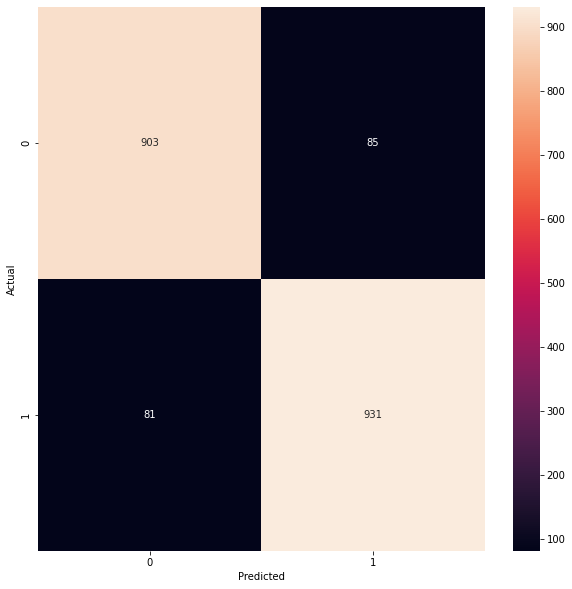

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_mat = confusion_matrix(y_true = y_test, y_pred = predict_bin)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=set(y_test), yticklabels=set(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
model_embedding.most_similar(negative=['amor'])

[('comfinalidade', 0.3696272373199463),
 ('atutela', 0.3682810366153717),
 ('construçio', 0.36499056220054626),
 ('ascen-deram', 0.3600977957248688),
 ('antes_de_ir_de_ferias_saiba_onde_vao_estar_os_radares_da_psp',
  0.35418379306793213),
 ('foifixado', 0.3528690040111542),
 ('administração-geral', 0.3500579297542572),
 ('redware', 0.3483659327030182),
 ('apenas000', 0.3444063365459442),
 ('audi-toria', 0.34424516558647156)]